In [17]:
import pandas as pd

In [18]:
df=pd.read_csv('Iris.csv')

In [19]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
#Taeget- Species

In [22]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
df.count().unique

<bound method Series.unique of Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64>

In [24]:
df.duplicated().sum()

0

In [25]:
df=df.drop('Id',axis=1)

In [26]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

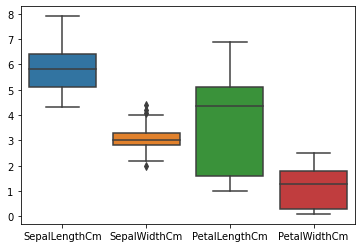

In [29]:
sns.boxplot(data=df)

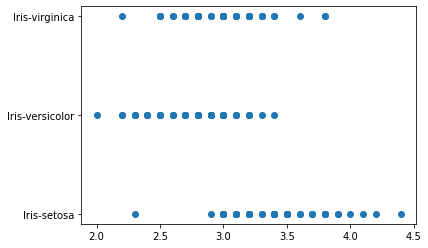

In [30]:
plt.scatter(df['SepalWidthCm'],df['Species'])   

C:\Users\vijja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

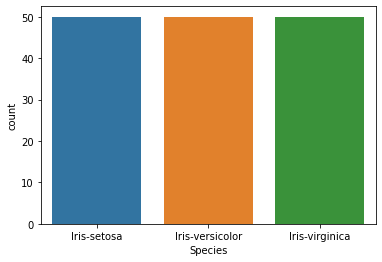

In [71]:
sns.countplot(df['Species'])

<AxesSubplot:>

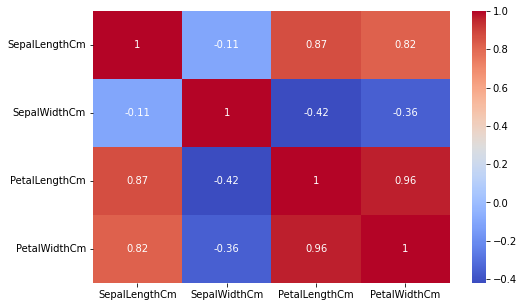

In [79]:
cor=df.corr()
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

In [31]:
x=df.drop('Species',axis=1)

In [32]:
y=df['Species']

In [34]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [47]:
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score,r2_score
print("Accuracy score: ",accuracy_score(y_test, y_pred))

Accuracy score:  0.9666666666666667


In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
model1 = GaussianNB()

In [53]:
model1.fit(x_train, y_train)

GaussianNB()

In [59]:
y_pred_gaus = model1.predict(x_test)

In [60]:
print("Accuracy score: ",accuracy_score(y_test, y_pred_gaus))

Accuracy score:  0.9666666666666667


In [61]:
from sklearn import svm

In [64]:
classifier = svm.SVC(kernel='linear')
 
classifier.fit(x_train, y_train)
y_pred1 = classifier.predict(x_test)

In [65]:
print("Accuracy score: ",accuracy_score(y_test, y_pred1))

Accuracy score:  1.0


In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [68]:
y_pred2 = classifier_rf.predict(x_test)

In [69]:
print("Accuracy score: ",accuracy_score(y_test, y_pred2))

Accuracy score:  0.9666666666666667
